In [5]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry', 'site_area']]
blocks_gdf.head()

,geometry,site_area
id,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",8.044667e+05
1,"POLYGON ((355412.142 6623378.149, 355411.700 6...",2.317313e+04
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",3.630058e+05
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",1.964145e+05
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",1.781752e+06


In [6]:
import pandas as pd

accessibility_matrix = pd.read_pickle('./../data/accessibility_matrix.pickle')
accessibility_matrix.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16280,16281,16282,16283,16284,16285,16286,16287,16288,16289,16290,16291,16292,16293,16294,16295,16296,16297,16298,16299,16300,16301,16302,16303,16304,16305,16306,16307,16308,16309,16310,16311,16312,16313,16314,16315,16316,16317,16318,16319
0,0.000000,18.718750,9.234375,17.21875,30.296875,27.390625,30.671875,23.281250,78.6875,81.2500,82.5625,81.4375,80.8125,76.2500,67.7500,73.1875,73.2500,81.2500,77.1250,79.0625,72.7500,66.5000,56.62500,48.43750,50.71875,93.8125,61.18750,73.3750,73.0625,75.4375,72.5625,92.8750,89.0000,84.3750,87.3125,86.8750,88.6250,91.6875,87.3750,81.1875,...,100.0625,113.1875,84.9375,105.8750,108.9375,89.0000,85.6250,128.8750,82.1250,76.5625,76.5625,82.1250,76.5625,82.1250,82.1250,76.5625,80.5000,76.5625,80.5000,76.5625,76.5625,76.5625,82.1250,82.1250,82.1250,83.5000,82.1250,76.5625,76.5625,82.1250,76.5625,102.5625,97.5000,132.250,130.8750,142.125,247.625,228.625,247.625,124.6250
1,17.859375,0.000000,19.015625,7.65625,20.281250,25.250000,25.234375,15.765625,76.8750,79.4375,80.7500,79.6250,79.0000,74.4375,65.9375,71.3750,71.4375,79.4375,75.3125,77.2500,70.9375,64.6250,54.78125,46.62500,48.90625,92.0000,59.03125,71.5625,71.2500,73.6250,70.7500,91.0625,87.1875,82.5625,85.5000,85.0625,86.8125,89.8750,85.5625,79.3750,...,98.2500,111.3750,83.1250,104.0625,107.1250,87.1875,83.8125,127.0625,80.3125,74.6875,74.6875,80.3125,74.6875,80.3125,80.3125,74.6875,78.6875,74.6875,78.6875,74.6875,74.6875,74.6875,80.3125,80.3125,80.3125,81.6250,80.3125,74.6875,74.6875,80.3125,74.6875,100.7500,95.6875,130.500,129.0000,140.250,245.875,226.875,245.875,112.5000
2,9.234375,20.796875,0.000000,20.21875,27.968750,25.062500,28.343750,20.953125,71.8750,74.4375,75.7500,74.6250,74.0000,69.5000,60.9375,66.3750,66.4375,74.4375,70.3125,72.2500,65.9375,59.6875,49.81250,41.65625,43.93750,87.0625,58.84375,66.5625,66.3125,68.6250,65.8125,86.1250,82.1875,77.5625,80.5625,80.0625,81.8750,84.9375,80.6250,74.4375,...,93.2500,106.3750,78.1250,99.1250,102.1875,82.2500,78.8750,122.0625,75.3125,69.7500,69.7500,75.3125,69.7500,75.3125,75.3125,69.7500,73.6875,69.7500,73.6875,69.7500,69.7500,69.7500,75.3125,75.3125,75.3125,76.6875,75.3125,69.7500,69.7500,75.3125,69.7500,95.8125,90.6875,125.500,124.0625,135.375,240.875,221.875,240.875,124.6250
3,15.937500,7.449219,18.421875,0.00000,21.109375,24.984375,27.781250,16.593750,76.3125,78.8125,80.1250,79.0000,78.4375,73.8750,65.3125,70.7500,70.8750,78.8125,74.6875,76.6875,70.3125,64.0625,54.21875,46.03125,48.31250,91.4375,58.78125,70.9375,70.6875,73.0000,70.1875,90.5000,86.5625,82.0000,84.9375,84.4375,86.2500,89.3125,85.0000,78.8125,...,97.6250,110.8125,82.5000,103.5000,106.5625,86.6250,83.2500,126.5000,79.7500,74.1250,74.1250,79.7500,74.1250,79.7500,79.7500,74.1250,78.0625,74.1250,78.0625,74.1250,74.1250,74.1250,79.7500,79.7500,79.7500,81.0625,79.7500,74.1250,74.1250,79.7500,74.1250,100.1875,95.0625,129.875,128.5000,139.750,245.250,226.250,245.250,113.3750
4,31.906250,19.765625,31.734375,21.28125,0.000000,21.781250,23.125000,15.429688,89.5625,92.1250,93.4375,92.3125,91.6875,81.7500,75.6250,81.0625,81.1250,92.1250,88.0000,89.9375,83.6250,74.3750,64.50000,56.34375,58.62500,101.7500,55.56250,76.8125,80.1875,77.0625,79.0000,103.8125,99.8750,95.2500,98.2500,97.7500,99.5625,102.6250,98.3125,92.1250,...,110.9375,124.0625,95.8125,116.8125,119.8750,99.9375,96.5625,139.7500,93.0000,87.4375,87.4375,93.0000,87.4375,93.0000,93.0000,87.4375,91.3750,87.4375,91.3750,87.4375,87.4375,87.4375,93.0000,93.0000,93.0000,94.3750,93.0000,87.4375,87.4375,93.0000,87.4375,113.5000,108.3750,143.125,141.7500,153.000,258.500,239.500,258.500,108.3125


## Accessibility analysis

### Median accessibility

In [7]:
from blocksnet.analysis.network.accessibility import median_accessibility, MEDIAN_ACCESSIBILITY_COLUMN

med_acc_df = median_accessibility(accessibility_matrix)

In [8]:
med_acc_df.head()

,median_accessibility
0,84.6875
1,81.6250
2,78.5625
3,81.3125
4,93.0000


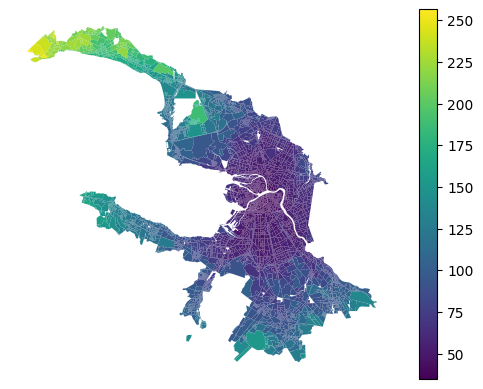

In [9]:
blocks_gdf.join(med_acc_df).plot(column=MEDIAN_ACCESSIBILITY_COLUMN, legend=True).set_axis_off()

### Max accessibility

In [10]:
from blocksnet.analysis.network.accessibility import max_accessibility, MAX_ACCESSIBILITY_COLUMN

max_acc_df = max_accessibility(accessibility_matrix)

In [11]:
max_acc_df.head()

,max_accessibility
0,299.75
1,298.00
2,293.00
3,297.50
4,310.75


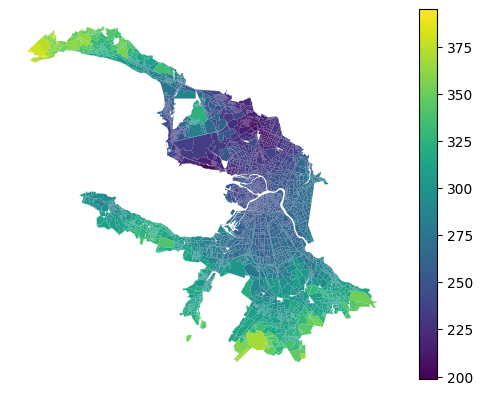

In [12]:
blocks_gdf.join(max_acc_df).plot(column=MAX_ACCESSIBILITY_COLUMN, legend=True).set_axis_off()

### Area weighted accessibility

In [13]:
from blocksnet.analysis.network.accessibility import area_accessibility, AREA_ACCESSIBILITY_COLUMN

area_acc_df = area_accessibility(accessibility_matrix, blocks_gdf)

In [14]:
area_acc_df.head()

,area_accessibility
id,
0,113.515315
1,109.100728
2,108.464070
3,109.170690
4,119.413257


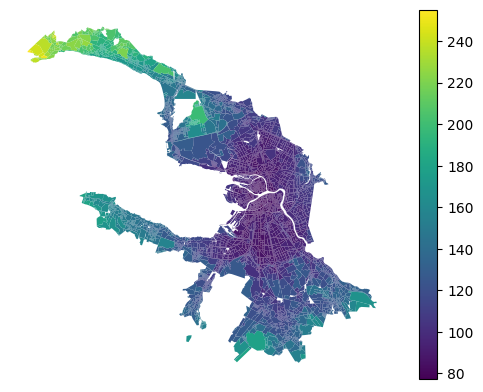

In [15]:
blocks_gdf.join(area_acc_df).plot(column=AREA_ACCESSIBILITY_COLUMN, legend=True).set_axis_off()

### Mean accessibility

In [16]:
from blocksnet.analysis.network.accessibility import mean_accessibility, MEAN_ACCESSIBILITY_COLUMN

min_acc_df = area_accessibility(accessibility_matrix, blocks_gdf)

In [17]:
area_acc_df.head()

,area_accessibility
id,
0,113.515315
1,109.100728
2,108.464070
3,109.170690
4,119.413257


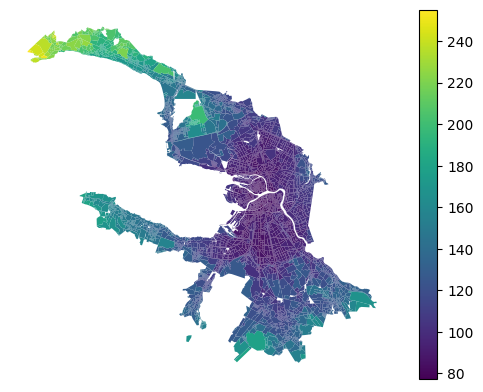

In [18]:
blocks_gdf.join(area_acc_df).plot(column=AREA_ACCESSIBILITY_COLUMN, legend=True).set_axis_off()

### Relative accessibility

In [19]:
from blocksnet.analysis.network.accessibility import relative_accessibility, RELATIVE_ACCESSIBILITY_COLUMN

rel_acc_df = relative_accessibility(accessibility_matrix, 0)

In [20]:
rel_acc_df.head()

,relative_accessibility
0,0.000000
1,18.718750
2,9.234375
3,17.218750
4,30.296875


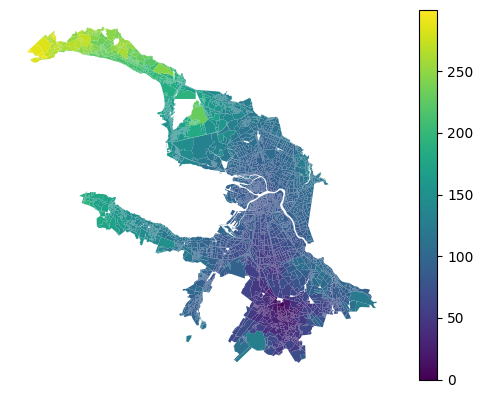

In [21]:
blocks_gdf.join(rel_acc_df).plot(column=RELATIVE_ACCESSIBILITY_COLUMN, legend=True).set_axis_off()

## Utils

### Get context

In [35]:
from blocksnet.analysis.network.accessibility import get_context

blocks_ids = [1,2,3,4,5,6]
context_ids = get_context(accessibility_matrix, blocks_ids, 30, out=False, keep=False)

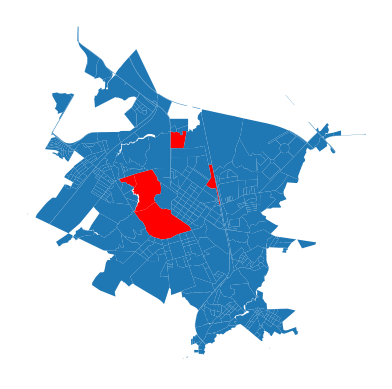

In [37]:
ax = blocks_gdf.loc[blocks_ids].plot(color='red')
blocks_gdf.loc[context_ids].plot(ax=ax).set_axis_off()